# ANN

In [20]:
import pandas as pd
from sklearn.model_selection import train_test_split
import torch
from torch.utils.data import Dataset, DataLoader
import torch.nn as nn
import torch.optim as optim
import matplotlib.pyplot as plt

In [21]:
# Set random seeds for reproducibility
torch.manual_seed(42)

In [22]:
df = pd.read_csv('fmnist_small.csv')
df.head()

,label,pixel1,pixel2,pixel3,pixel4,pixel5,pixel6,pixel7,pixel8,pixel9,...,pixel775,pixel776,pixel777,pixel778,pixel779,pixel780,pixel781,pixel782,pixel783,pixel784
0,9,0,0,0,0,0,0,0,0,0,...,0,7,0,50,205,196,213,165,0,0
1,7,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,0,0,0,0,0,0,1,0,0,0,...,142,142,142,21,0,3,0,0,0,0
3,8,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,8,0,0,0,0,0,0,0,0,0,...,213,203,174,151,188,10,0,0,0,0


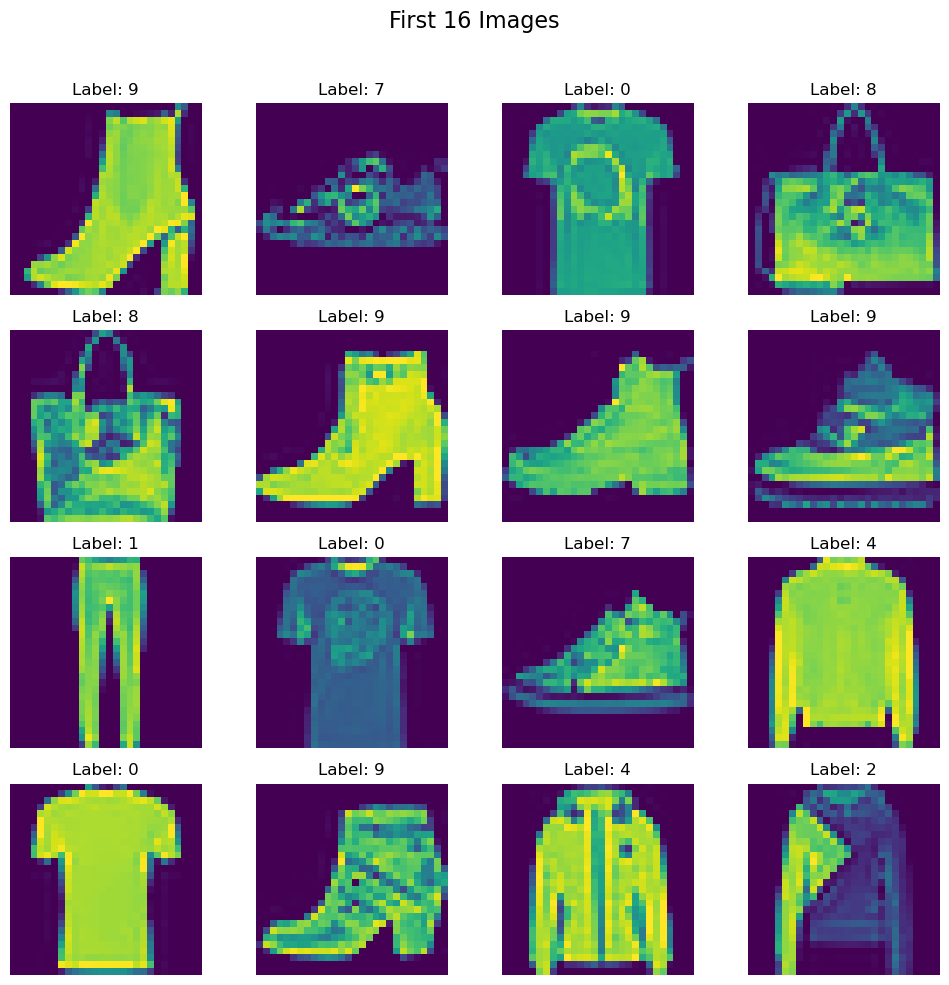

In [23]:
#Just checking images (first 16 images)
# Create a 4x4 grid of images
fig, axes = plt.subplots(4, 4, figsize=(10, 10))
fig.suptitle("First 16 Images", fontsize=16)

# Plot the first 16 images from the dataset
for i, ax in enumerate(axes.flat):
    img = df.iloc[i, 1:].values.reshape(28, 28)  # Reshape to 28x28
    ax.imshow(img)  # Display in grayscale
    ax.axis('off')  # Remove axis for a cleaner look
    ax.set_title(f"Label: {df.iloc[i, 0]}")  # Show the label

plt.tight_layout(rect=[0, 0, 1, 0.96])  # Adjust layout to fit the title
plt.show()

#Test train split

In [24]:
# train test split

x = df.iloc[:, 1:].values
y = df.iloc[:, 0].values
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=42)

#Scaling

#To keep the value between 0 and 1

In [25]:
#Scaling features
x_train = x_train/255.0

x_test = x_test/255.0

In [26]:
x_train

array([[0.       , 0.       , 0.       , ..., 0.       , 0.       ,
        0.       ],
       [0.       , 0.       , 0.       , ..., 0.       , 0.       ,
        0.       ],
       [0.       , 0.       , 0.       , ..., 0.       , 0.       ,
        0.       ],
       ...,
       [0.       , 0.       , 0.       , ..., 0.       , 0.       ,
        0.       ],
       [0.       , 0.       , 0.       , ..., 0.       , 0.       ,
        0.       ],
       [0.       , 0.       , 0.       , ..., 0.0627451, 0.       ,
        0.       ]])

#Custom Dataset

In [27]:
from torch.utils.data import Dataset, DataLoader

class CustomDataset(Dataset):

    def __init__(self,features,labels):
        # lets convert features and labels to tensors at the time of initialization
        self.features = torch.tensor(features, dtype = torch.float32)
        #Features expectes to be float and label to be long

        self.labels = torch.tensor(labels, dtype=torch.long)

    def __len__(self):
        return len(self.features)
    
    def __getitem__(self,idx):

        return self.features[idx] , self.labels[idx]
    

#train test

In [28]:
training_data = CustomDataset(x_train, y_train)
testing_data = CustomDataset(x_test, y_test)

In [29]:
training_data[0]

(tensor([0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
         0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
         0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
         0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
         0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
         0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
         0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
         0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
         0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
         0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
         0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
         0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
         0.0000, 0.0000, 0.0

#Data Loader

In [30]:
train_loader = DataLoader(training_data, batch_size = 32 , shuffle=True)

test_loader = DataLoader(testing_data, batch_size = 32 , shuffle=False) 

# S that test data is not shuffled

# Model Building

In [31]:
# Define NN class

class MyNN(nn.Module):

    def __init__(self,num_features):
        
        super().__init__()

        self.model = nn.Sequential(
            nn.Linear(num_features,128),
            nn.ReLU(),
            nn.Linear(128,64),
            nn.ReLU(),
            nn.Linear(64,10)
            # nn.Softmax() 
            # ->adding because pytorch will add it  automatically in cross entropy loss
        )

    def forward(self,x):
        
        return self.model(x)
    
    

In [32]:
# epochs , learning rate
epochs =100
learning_rate = 0.1


In [33]:
#Model object, Loss  and optimizer

model = MyNN(x_train.shape[1])

# Loss function

loss_function = nn.CrossEntropyLoss()

#Optimizer

optimizer = optim.SGD(model.parameters(), lr = learning_rate)


#Training

In [34]:
for epoch in range (epochs):
    
    total_loss = 0

    for batch_features ,batch_labels in train_loader:
        
        #Forward pass

        outputs = model(batch_features)

        #loss calculate
        # make grad zero before calculating loss
        
        optimizer.zero_grad()
        loss = loss_function(outputs , batch_labels)

        #Backward pass
        loss.backward()

        #optimizer step
        optimizer.step()

        #total loss
        total_loss = total_loss + loss.item()
    
    # avg loss is loss per batch in each epoch
    avg_loss = total_loss / len(train_loader)
    print(f"Epoch : {epoch+1} , Average Loss : {avg_loss}")




Epoch : 1 , Average Loss : 1.3216368520259858
Epoch : 2 , Average Loss : 0.7793365579843521
Epoch : 3 , Average Loss : 0.6427524695793788
Epoch : 4 , Average Loss : 0.5751657489935557
Epoch : 5 , Average Loss : 0.5281801910201709
Epoch : 6 , Average Loss : 0.4952874990304311
Epoch : 7 , Average Loss : 0.46024329950412113
Epoch : 8 , Average Loss : 0.43594589988390603
Epoch : 9 , Average Loss : 0.4182921428481738
Epoch : 10 , Average Loss : 0.3984092238545418
Epoch : 11 , Average Loss : 0.38502645591894785
Epoch : 12 , Average Loss : 0.372268552283446
Epoch : 13 , Average Loss : 0.34773620883623757
Epoch : 14 , Average Loss : 0.34672420596083003
Epoch : 15 , Average Loss : 0.31388126537203787
Epoch : 16 , Average Loss : 0.31264611408114434
Epoch : 17 , Average Loss : 0.2955209298928579
Epoch : 18 , Average Loss : 0.28571509405970574
Epoch : 19 , Average Loss : 0.27084775634109975
Epoch : 20 , Average Loss : 0.26237100263436636
Epoch : 21 , Average Loss : 0.25756084914008776
Epoch : 22 ,

In [36]:
# Total batch
len(train_loader)

150

# Evaluation

In [38]:
# Set the model to evaluation mode
# Because model behave differently during training and evaluation
# e.g. dropout , batchnorm etc
model.eval()

MyNN(
  (model): Sequential(
    (0): Linear(in_features=784, out_features=128, bias=True)
    (1): ReLU()
    (2): Linear(in_features=128, out_features=64, bias=True)
    (3): ReLU()
    (4): Linear(in_features=64, out_features=10, bias=True)
  )
)

In [39]:
# batch in test
len(test_loader)

38

In [43]:
# evaluation code from scratch
total = 0
correct = 0

with torch.no_grad():

  for batch_features, batch_labels in test_loader:

    outputs = model(batch_features)

    _, predicted = torch.max(outputs, 1)

    total = total + batch_labels.shape[0]

    correct = correct + (predicted == batch_labels).sum().item()

print(correct/total)

0.8175


In [44]:
from sklearn.metrics import accuracy_score

model.eval()
y_true, y_pred = [], []
with torch.no_grad():
    for X, y in test_loader:
        outputs = model(X)
        preds = outputs.argmax(dim=1)
        y_true.extend(y.cpu().numpy())
        y_pred.extend(preds.cpu().numpy())

accuracy = accuracy_score(y_true, y_pred)
print("Test accuracy:", accuracy)

Test accuracy: 0.8175
